In [1]:
import pandas as pd
import numpy as np
from AllFunctions import *
from numpy import log2, log, sqrt
import matplotlib.pyplot as plt
import random
from random import sample

In [2]:
# txtfile = open('bank/data-desc.txt', 'r')
# print(txtfile.read())

In [3]:
C = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 
 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
types = ['numeric', 'categorical', 'categorical', 'categorical', 'binary', 'numeric', 
                      'binary', 'binary', 'categorical', 'numeric', 'categorical', 'numeric', 
                      'numeric', 'numeric', 'numeric', 'categorical', 'binary']
dic= dict(zip(C, types))

In [4]:
train = pd.read_csv('bank/train.csv', names = C)
test = pd.read_csv('bank/test.csv', names = C)
#train.head()

In [5]:
median_dict = {}
Train_new =pd.DataFrame()
Test_new =pd.DataFrame()
for name in C:
    if dic[name] == 'numeric':
        M = train[name].median()
        median_dict[name] = M
        Train_new[name+ '>' + str(M)] = np.where(train[name]  > M, 'yes', 'no')
        Test_new[name+ '>' + str(M)] = np.where(test[name]  > M, 'yes', 'no')
    else:
        Train_new[name] = train[name]
        Test_new[name] = test[name]

In [6]:
Train = []
Label = []
for i in range(len(Train_new)):
    temp = list(Train_new.loc[i])
    Train.append(temp[:-1])
    Label.append(temp[-1])

In [7]:
Test = []
Test_Label = []
for i in range(len(Test_new)):
    temp = list(Test_new.loc[i])
    Test.append(temp[:-1])
    Test_Label.append(temp[-1])

In [8]:
for i in range(len(Label)):
    if Label[i] == 'yes':
        Label[i] = 1
    else:
        Label[i] = -1

In [9]:
for i in range(len(Test_Label)):
    if Test_Label[i] == 'yes':
        Test_Label[i] = 1
    else:
        Test_Label[i] = -1

In [10]:
atts = list(range(0,len(C)-1))

In [11]:
Ada = Adaboost(Train, Label, 500, depth = 3)

starting adaboost for 500 iterartions


In [12]:
E_train = Ada.Error(Train, Label, n = 500)
E_test = Ada.Error(Test, Test_Label, n = 500)

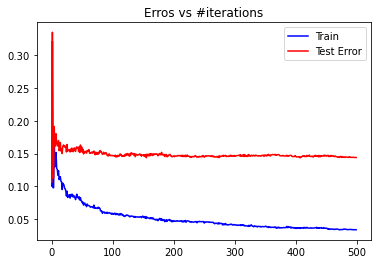

In [13]:
plt.plot(E_train[:], color ='blue', label = "Train")
plt.plot(E_test[:], color ='red', label = "Test Error")

plt.axis()
plt.title("Erros vs #iterations", color='black') 
plt.legend()
plt.show()

In [14]:
E_test_ = []
E_train_ = []
for T in Ada.Trees:
    E_train_.append(0)
    E_test_.append(0)
    n = len(Train)
    m = len(Test)
    for i in range(n):
        if T.predict(Train[i]) != Label[i]:
            E_train_[-1] += 1/n
    for i in range(m):
        if T.predict(Test[i]) != Test_Label[i]:
            E_test_[-1] += 1/m

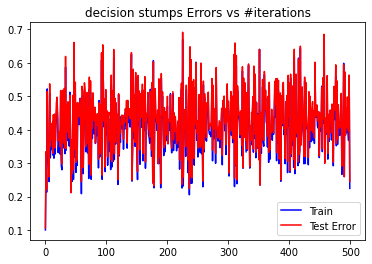

In [15]:
plt.plot(E_train_[:], color ='blue', label = "Train")
plt.plot(E_test_[:], color ='red', label = "Test Error")

plt.axis()
plt.title("decision stumps Errors vs #iterations", color='black') 
plt.legend()
plt.show()